&emsp;&emsp;**Генерація даних з різних розподілів та візуалізація**

&emsp;&emsp;Більшість розподілів можна згенерувати за допомогою numpy.random: 

In [1]:
import numpy as np

n = 10
p = 0.5
k = 5

x = np.random.binomial(n, p, 10000000)
sum([1 for item in x if item == k]) / len(x)


0.2460294

In [2]:
x = np.random.poisson(
    lam=6, # значення параметра лямбда
    size=100000 #кількість прикладів, які потрібно згенерувати
)
sum([1 for item in x if item == 4]) / len(x)

0.13448

In [10]:
6 ** 4 / 24 * np.exp(-6)

0.13385261753998337

In [14]:
x = np.random.normal(
     loc=170, # Середнє значення величини
     scale=10, # стандартне відхилення
     size=10000 # кількість прикладів, які потрібно згенерувати
)
x
sum([1 for item in x if 160 <= item <= 180]) / len(x)

0.6856

In [15]:
import numpy as np
from matplotlib import pyplot as plt # бібліотека для візуалізації в Python

# нормально розподілена величина
normal_variable = np.random.normal(
     loc = 0, # Середнє значення величини
     scale=1, # стандартне відхилення
     size=10000 # кількість прикладів, які потрібно згенерувати
)

# біноміально розподілена величина
binomial_variable = np.random.binomial(
     n=10,
     p=0.5,
     size=10000 # кількість прикладів, які потрібно згенерувати
)

# величина, розподілена за законом Пуассона
poisson_variable = np.random.poisson(
     lam=4, # значення параметра лямбда
     size=10000 #кількість прикладів, які потрібно згенерувати
)

# рівномірно розподілена величина на інтервалі від 10 до 20
uniform_10_20 = np.random.uniform(low=10, high=20, size=10000)

&emsp;&emsp;При генерації випадкових чисел, перезапускаючи програму будуть виходити щоразу інші значення. Для того, щоб значення були однаковими за різних запусків, необхідно зафіксувати випадковий стан:

In [22]:
np.random.seed(12)
np.random.normal(
     loc = 0, # Середнє значення величини
     scale=1, # стандартне відхилення
     size=10 # кількість прикладів, які потрібно згенерувати
)

array([ 0.47298583, -0.68142588,  0.2424395 , -1.70073563,  0.75314283,
       -1.53472134,  0.00512708, -0.12022767, -0.80698188,  2.87181939])

In [23]:
np.random.seed(42)  # встановлюємо випадковий стан, що дорівнює довільному числу

&emsp;&emsp;Для візуалізації розподілу практично користуються гістограмою:

In [32]:
from matplotlib import pyplot as plt
def display_density(random_variable, var_name='', bins=None):
    
    # функція для побудови гістограми
    plt.hist(
        x=random_variable, # змінна, гістограму якої потрібно побудувати
        density=True, # параметр, який визначає, чи потрібно уявити гістограму як щільність розподілу
        bins=bins # у стовпців у гістограмі
    )
    
    plt.xlabel('Random variable') # помістити на графік назву горизонтальної осі
    plt.ylabel('pdf') # помістити на графік назву вертикальної осі
    plt.title(f'{var_name} density plot') # назва всього графіка
    
    plt.show() # виклик функції, яка виведе отриманий графік на екран

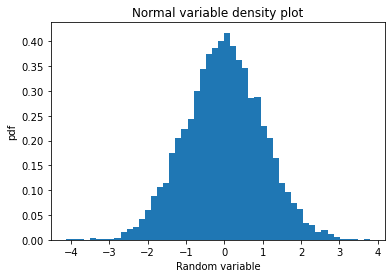

In [33]:
display_density(normal_variable, var_name='Normal variable', bins=50)

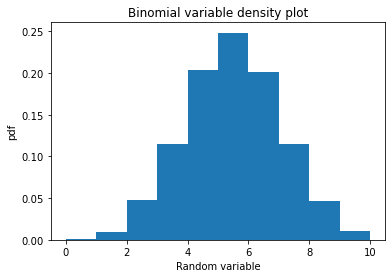

In [37]:
display_density(binomial_variable, var_name='Binomial variable', bins=10)

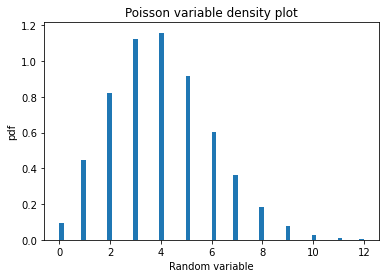

In [40]:
display_density(poisson_variable, var_name='Poisson variable', bins=70)

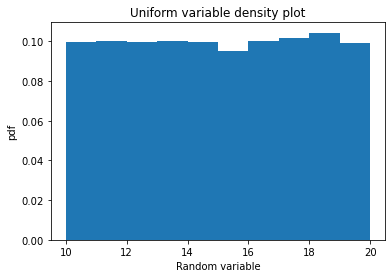

In [41]:
display_density(uniform_10_20, var_name='Uniform variable')

&emsp;&emsp;Для генерації чисел із довільного розподілу зручно користуватися функцією створення вибірки.  
&emsp;&emsp;Приклад: зробити вибірку з розподілу, в якому випадкова величина набуває значення 1 c ймовірністю 0.5, 2 з ймовірністю 0.3 та 3 з ймовірністю 0.2:

In [44]:
custom_sample = np.random.choice(
    a=[1, 2, 3], # область значень випадкової величини
    p=[0.5, 0.3, 0.2], # розподіл ймовірностей
    size=1000, # у прикладів, які потрібно згенерувати
    replace=True # чи повертати приклад після вибору назад, щоб його можна було ще раз вибрати в майбутньому
)

unique_values, counts = np.unique(custom_sample, return_counts=True)
print(dict(zip(unique_values, counts)))

{1: 484, 2: 312, 3: 204}


In [43]:
custom_sample

array([1, 3, 2, 2, 1, 1, 1, 3, 2, 2, 1, 3, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 3, 3, 3, 1, 1, 2, 1, 1, 1, 1, 3,
       1, 2, 1, 2, 2, 1, 3, 2, 3, 3, 2, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2,
       1, 3, 1, 3, 2, 1, 1, 3, 2, 2, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 2,
       3, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 1, 1,
       1, 1, 3, 3, 2, 3, 3, 1, 3, 2, 3, 3, 1, 1, 1, 1, 3, 3, 1, 2, 1, 1,
       1, 1, 3, 1, 2, 2, 1, 3, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1,
       3, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 3, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 3, 1, 1, 1, 3, 3, 1, 2, 3, 2, 2, 1, 1, 3, 3, 2, 1, 1, 2, 3,
       3, 2, 2, 1, 1, 3, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 3,
       2, 2, 1, 1, 1, 1, 3, 1, 3, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 3, 3,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 2, 3, 2, 2, 1, 2, 3, 1, 2,
       3, 2, 2, 2, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 3, 1, 1, 2, 2, 1, 2, 1, 1,

&emsp;&emsp;Найчастіше функцією "choice" користуються, щоб зробити вибірку з вже наявної змінної:

In [45]:
# створимо вибірку розміру 10 із неповторних значень "normal_varialbe"
normal_sample = np.random.choice(normal_variable, size=10, replace=False)
print(normal_sample)

[-1.57641653  0.20532648  0.88332197  0.43053665  1.13104346 -0.58506215
  1.06314381  0.79557164  0.4181949  -1.71885606]


&emsp;&emsp;**Характеристики розподілу**

In [46]:
from scipy import stats

print('середнє значення: ', np.mean(poisson_variable))
print('стандартне відхилення:', np.std(poisson_variable))
print('медіана:', np.median(poisson_variable))
print('мінімальне значення: ', np.min(poisson_variable))
print('максимальне значення:', np.max(poisson_variable))

print('ексцес: ', stats.kurtosis(poisson_variable))
print('асиметрія: ', stats.skew(poisson_variable))
print('мода: ', stats.mode(poisson_variable))

D:\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


середнє значення:  4.0166
стандартне відхилення: 1.9897046112425834
медіана: 4.0
мінімальне значення:  0
максимальне значення: 12
ексцес:  0.06345876991075583
асиметрія:  0.4527612216920886
мода:  ModeResult(mode=array([4]), count=array([1986]))


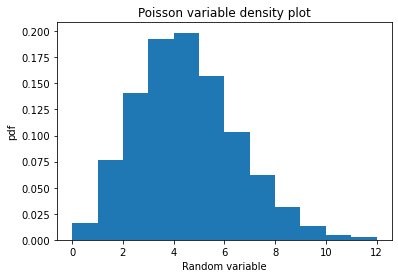

In [47]:
display_density(poisson_variable, var_name='Poisson variable', bins=np.max(poisson_variable))

&emsp;&emsp;**Зв'язок між двома величинами**

&emsp;&emsp;При обчисленні коварацій/кореляцій зазвичай їх групують у коварійні/кореляційні матриці.  
&emsp;&emsp;У разі коваріації на виході буде симетрична матриця. На головній діагоналі такої матриці (елементи з індесами [i, i]) будуть дисперсії відповідних змінних, а на позиціях [i, j] – коваріації змінної i зі змінною j: 

In [48]:
np.cov(binomial_variable, poisson_variable)

array([[ 2.55520368, -0.05088557],
       [-0.05088557,  3.95932037]])

In [50]:
np.std(binomial_variable) ** 2

2.55494816

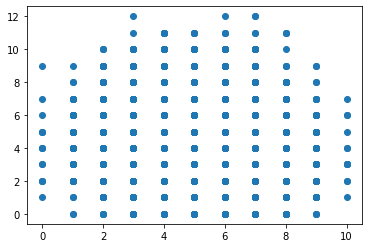

In [49]:
plt.scatter(binomial_variable, poisson_variable)

&emsp;&emsp;Для кореляційної матриці все так само, але на головній діагоналі завжди буде число 1, а на позиціях [i, j] - коефіцієнти кореляції змінної i і j:

In [51]:
np.corrcoef(binomial_variable, poisson_variable)

array([[ 1.        , -0.01599822],
       [-0.01599822,  1.        ]])

&emsp;&emsp;З отриманих вище матриць можна легко зробити висновок, що змінні "binomial_variable" та "poisson_variable" лінійно незалежні.

&emsp;&emsp;**Вправи** (розв'язати завдання на папері та надіслати фото рішення)

1. Для вибірки $x$ де $x$ - нормально розподілена величина

$$f(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x - \mu)^{2}}{2\sigma^{2}}}$$

&emsp;&emsp;знайти оптимальне значення $\mu$ i $\sigma$

$x_1, x_2, ..., x_n$
$$L(\mu, \sigma) = \ln\big(\sum\limits_{i=1}^{n} f(x_i)\big) =\ln\big(\sum\limits_{i=1}^{n} \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x_i - \mu)^{2}}{2\sigma^{2}}}\big) $$

2. Дано випадкову величину $y$, яка залежить від іншої випадкової величини $x$. Ймовірність $y$ визначається як

$$P(y_{i}) = \frac{(ax_{i})^{y_{i}}}{y_{i}!}e^{-ax_{i}}$$

&emsp;&emsp;знайти оптимальне значення параметра $a$